In [6]:
# import autograd's automatic differentiator
from autograd import grad
from autograd import hessian
import autograd.numpy as np
import matplotlib.pyplot as plt

In [7]:
# Newton's method
def newtons_method(g, max_its, w):
    # compute gradient/Hessian using autograd
    gradient = grad(g)
    hess = hessian(g)
    
    # set numerical stability parameter
    epsilon = 10**-7
        
    # run the Newton's method loop
    weight_history = [w] # container for weight history
    cost_history = [g(w)] # container for cost function history
    for k in range(max_its):
        
        # evaluate the gradient and hessian
        grad_eval = gradient(w)
        hess_eval = hess(w)
        
        # reshape hessian to square matrix
        hess_eval.reshape(int(np.size(hess_eval)**0.5),int(np.size(hess_eval)**0.5))
        
        # solve second-order system for weight updata
        A = hess_eval + epsilon * np.eye(w.size)
        b = grad_eval
        w = np.linalg.solve(A, np.dot(A, w) - b)
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
        
    return weight_history, cost_history
    

In [8]:
# define our g(w)
g = lambda w:np.log(1 + np.exp(np.dot(w,w)))

In [9]:
def costfunction_history(weight_history, g):
    #loop over weight history and compute associated cost function history
    cost_history = []
    for i in range(len(weight_history)):
        cost_history.append(g(weight_history[i]))
    fig, axes = plt.subplots(1, 1, figsize = (6, 3))
    axes.plot(range(len(weight_history)),cost_history)
    axes.set_xlabel("iterations")
    axes.set_ylabel("cost function")
    plt.show()

In [10]:
# set parameters
w_init = np.array([1.0,1.0])
max_its = 10
weight_hist, cost_hist = newtons_method(g, max_its, w_init)

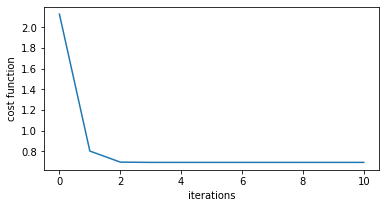

In [11]:
costfunction_history(weight_hist, g)

In [12]:
print(weight_hist[-1])

[6.14401006e-53 6.14401006e-53]


So that the optimal w is [0,0]

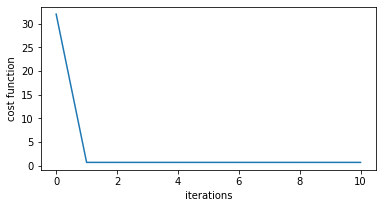

In [13]:
# set the parameters in (d)
w_init = np.array([4.0, 4.0])
weight_hist, cost_hist = newtons_method(g, max_its, w_init)
costfunction_history(weight_hist, g)

The explaination: the direct reason is that the inverse of second-order g(w) is much larger at [4,4] than that at [1,1]. 
In other words, the descent "acceleration" at [4,4] is larger than the initial [1,1], which leads the g(w) to the bottom value in just one iteration.

In [18]:
w_init = np.random.randn(5)
x = np.random.randn(10,5)
np.dot(w_init,x)
#weight_hist, cost_hist = newtons_method(g, max_its, w_init)

ValueError: shapes (5,) and (10,5) not aligned: 5 (dim 0) != 10 (dim 0)